# WeatherPy

## Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import time
import statsmodels.api as sm
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and long combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = "appid=" + weather_api_key + "&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + api_key + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ko samui
Processing Record 2 of Set 1 | kasra
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | acapulco
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | dubbo
Processing Record 9 of Set 1 | dunda
Processing Record 10 of Set 1 | orocue
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | saint-paul
Processing Record 16 of Set 1 | dingli
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | taksim

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ko samui,9.5357,99.9357,32.95,66,20,3.60,TH,1682308639
1,jamestown,42.0970,-79.2353,5.77,87,100,3.09,US,1682308560
2,port alfred,-33.5906,26.8910,21.72,60,100,2.36,ZA,1682308620
3,acapulco,16.8634,-99.8901,27.90,69,20,2.57,MX,1682308501
4,hilo,19.7297,-155.0900,25.85,80,100,4.63,US,1682308641


In [11]:
# Export the City_Data into a CSV
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ko samui,9.5357,99.9357,32.95,66,20,3.60,TH,1682308639
1,jamestown,42.0970,-79.2353,5.77,87,100,3.09,US,1682308560
2,port alfred,-33.5906,26.8910,21.72,60,100,2.36,ZA,1682308620
3,acapulco,16.8634,-99.8901,27.90,69,20,2.57,MX,1682308501
4,hilo,19.7297,-155.0900,25.85,80,100,4.63,US,1682308641


# Create the Scatter Plots Requested

#### Latitude versus Temperature

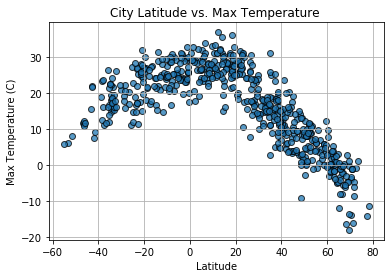

In [13]:
# Build scatter plot for latitude vs. temperature
x_values_t = city_data_df["Lat"]
y_values_t = city_data_df["Max Temp"]
plt.scatter(x_values_t,y_values_t, marker="o", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
# today = date.today()

plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude versus Humidity

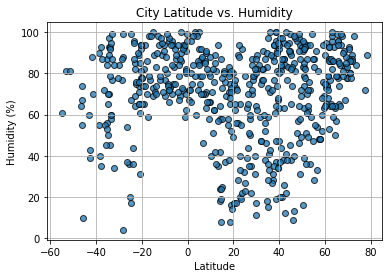

In [14]:
# Build the scatter plots for latitude vs. humidity
x_values_h = city_data_df["Lat"]
y_values_h = city_data_df["Humidity"]
plt.scatter(x_values_h,y_values_h, marker="o", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude versus Cloudiness

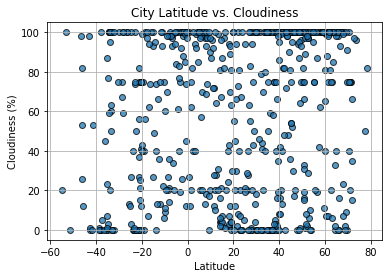

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_values_c = city_data_df["Lat"]
y_values_c = city_data_df["Cloudiness"]
plt.scatter(x_values_c,y_values_c, marker="o", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude versus Wind Speed

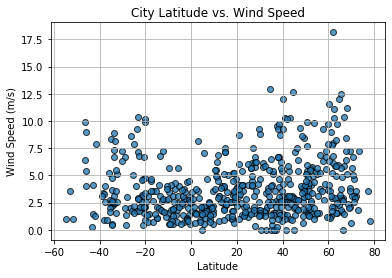

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_values_ws = city_data_df["Lat"]
y_values_ws = city_data_df["Wind Speed"]
plt.scatter(x_values_ws,y_values_ws, marker="o", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Compute Linear Regression for Each Relationship

In [34]:
# Define a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
def linregplot(x,y,c,d,e,f):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    # Get regression values
    regress_values = x * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create Plot
    plt.figure(figsize=(8,6))
    plt.scatter(x,y,s=60)
    plt.plot(x,regress_values,"r-")
    # Label plot and annotate the line equation
    plt.tick_params(axis='both',which='major',labelsize=12)
    plt.xlabel(c,size=12)
    plt.ylabel(d,size=12)
    plt.annotate(line_eq,(e,f),fontsize=15,color="red")
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    # Show plot
    plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ko samui,9.5357,99.9357,32.95,66,20,3.60,TH,1682308639
1,jamestown,42.0970,-79.2353,5.77,87,100,3.09,US,1682308560
3,acapulco,16.8634,-99.8901,27.90,69,20,2.57,MX,1682308501
4,hilo,19.7297,-155.0900,25.85,80,100,4.63,US,1682308641
8,orocue,4.7912,-71.3354,23.55,92,100,1.84,CO,1682308643


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']< 0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,21.72,60,100,2.36,ZA,1682308620
5,busselton,-33.6500,115.3333,15.42,58,50,7.37,AU,1682308642
6,dubbo,-32.2500,148.6167,26.07,34,0,5.14,AU,1682308298
7,dunda,-8.1167,34.2500,16.66,96,99,0.50,TZ,1682308643
10,rikitea,-23.1203,-134.9692,26.63,85,100,7.14,PF,1682308644


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.818518978910075


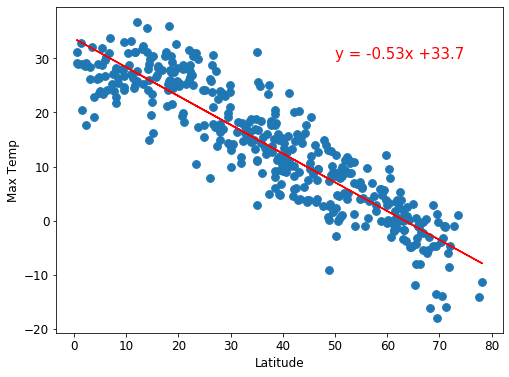

In [41]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = 50
f = 30
linregplot(x,y,c,d,e,f)

The r-value is: 0.4395055179468818


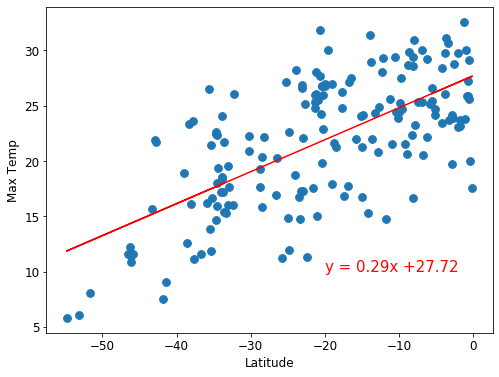

In [57]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = -20
f = 10
linregplot(x,y,c,d,e,f)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03449984402231352


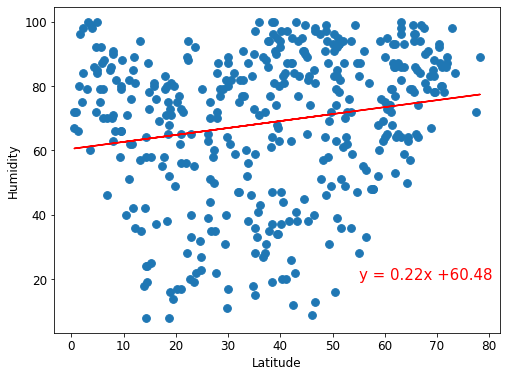

In [60]:
# Northern Hemisphere
# # Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = 55
f = 20
linregplot(x,y,c,d,e,f)

The r-value is: 0.12630194659676341


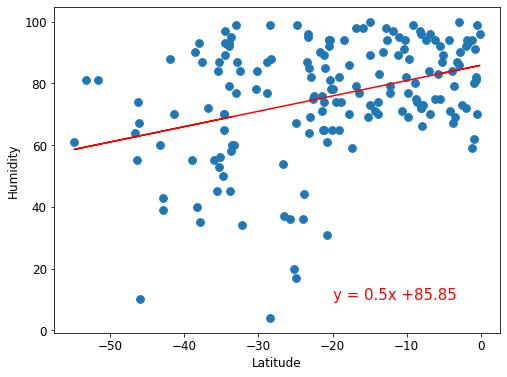

In [61]:
# Southern Hemisphere
# # Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = -20
f = 10
linregplot(x,y,c,d,e,f)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.018883469817912453


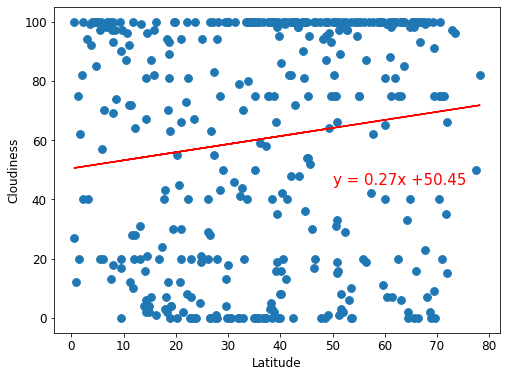

In [63]:
# Northern Hemisphere
# # Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = 50
f = 45
linregplot(x,y,c,d,e,f)

The r-value is: 0.07609371320487587


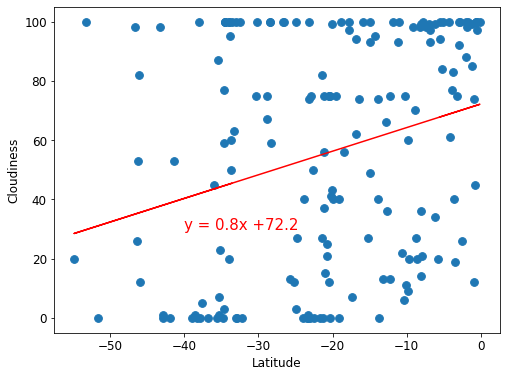

In [67]:
# Southern Hemisphere
# # Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = -40
f = 30
linregplot(x,y,c,d,e,f)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0636421352928391


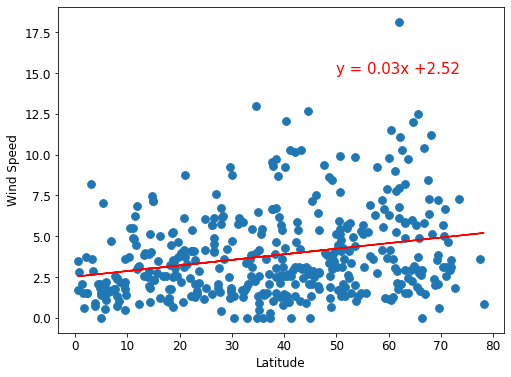

In [69]:
# Northern Hemisphere
# # Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = 50
f = 15
linregplot(x,y,c,d,e,f)

The r-value is: 0.0630125445343757


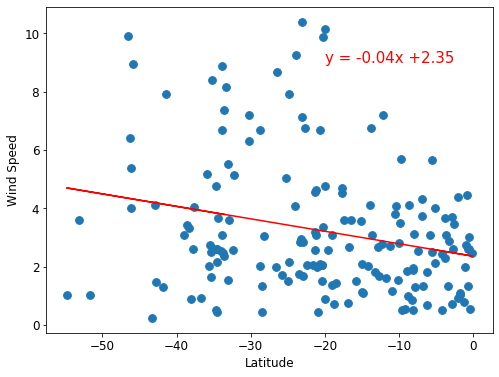

In [71]:
# Southern Hemisphere
# # Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = -20
f = 9
linregplot(x,y,c,d,e,f)